In [1]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("startup.csv",names=["Name","Profile URL","Signal","Joined","Location","Market","Website","Employees","Stage","Total Raised"])

In [3]:
df.head()

,Name,Profile URL,Signal,Joined,Location,Market,Website,Employees,Stage,Total Raised
0,MixRank,https://angel.co/company/mixrank,5,Oct '11,San Francisco,Sales Automation,http://mixrank.com,1-10,Seed,1500000
1,Precog,https://angel.co/company/precog,5,Mar '12,Boulder,Developer APIs,http://precog.com,1-10,Acquired,2818000
2,LaunchTrack,https://angel.co/company/launchtrack,5,Apr '12,Mountain View,E-Commerce Platforms,http://www.LaunchTrack.com,1-10,Acquired,142500
3,Homejoy,https://angel.co/company/homejoy,5,Jan '12,San Francisco,Hospitality,http://www.homejoy.com,51-200,Series A,39700000
4,Sliced Investing,https://angel.co/company/sliced-investing,5,Jul '14,San Francisco,Investment Management,https://www.slicedinvesting.com/?ref=al,1-10,Seed,2000000


In [4]:
df.shape

(753, 10)

In [280]:
# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True) 
#df.drop_duplicates(subset=None, inplace=True)


In [281]:
df[['Joining_Month','Joining_Year']] = df.Joined.str.split("'",expand=True) 


In [282]:
df.drop(['Joined'], axis=1, inplace=True)

In [283]:
df['Joining_Year'] = ('20' + df['Joining_Year'])



In [156]:
df=df.sort_values(by=['Joining_Year'])

In [284]:
df.head()

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year
39,Next Glass,https://angel.co/company/next-glass-2,4,Wilmington,Wine And Spirits,http://www.nextglass.co,11-50,Seed,75000,Apr,2013
41,Match2One,https://angel.co/company/match2one,4,Stockholm,Advertising Platforms,http://www.match2one.com,1-10,NaN,NaN,Jan,2015
43,FlyElephant,https://angel.co/company/flyelephant,4,Odessa,High Performance Computing,http://flyelephant.net,1-10,NaN,NaN,Jun,2013
44,AgShift,https://angel.co/company/agshift,4,Santa Clara,Technology,http://www.agshift.com,1-10,NaN,NaN,Jun,2016
47,tuplejump,https://angel.co/company/tuplejump,3,Hyderabad,Predictive Analytics,http://www.tuplejump.com,1-10,NaN,NaN,Feb,2013


In [158]:
df.count()

Name             497
Profile URL      497
Signal           497
Location         481
Market           493
Website          496
Employees        479
Stage            274
Total Raised     285
Joining_Month    497
Joining_Year     497
dtype: int64

In [159]:
df['Location'].unique()

array(['San Francisco', 'Boston', 'Berkeley', 'Toronto', 'Portland',
       'Nairobi', 'Rome', 'Palo Alto', 'Atlanta', 'Ann Arbor', 'London',
       'Paris', 'United Kingdom', 'Iran', 'Las Vegas', 'Austin',
       'São Paulo', 'Oakland', 'New York City', 'Sofia', 'Houston',
       'Jacksonville', 'Denver', 'Baltimore', 'Zagreb', 'Israel',
       'Jordan, JO', 'Oklahoma City', 'Melbourne', 'Lyndhurst',
       'Redwood City', 'Mountain View', 'Seattle', 'Sunnyvale',
       'San Mateo', 'Cambridge', 'Cairo Governorate', 'Mexico City',
       'Buenos Aires', 'Hyderabad', 'San Francisco Bay Area',
       'Los Angeles', 'Saint Petersburg', 'Hamburg', 'Memphis', 'Mumbai',
       'Campbell', 'Helsinki', 'Tallinn', 'Cheltenham', 'Montreal',
       'Blacksburg', 'Zurich', nan, 'Samara', 'Fremont', 'Belfast',
       'Joinville', 'Boulder', 'Budapest', 'San Diego', 'Delhi', 'Sydney',
       'Barcelona', 'Fredericton', 'Medellín', 'Gurgaon', 'Chicago',
       'Los Alamos', 'Berlin', 'Wilmington', '

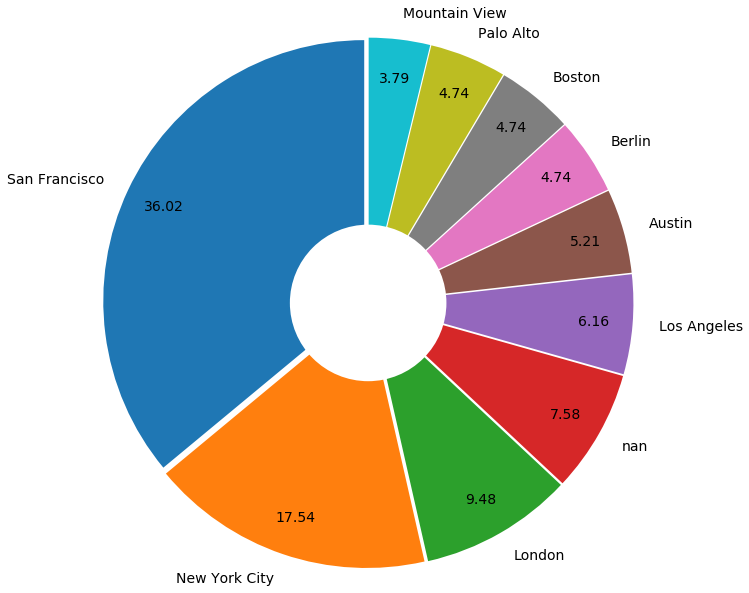

In [304]:
c=Counter(df.Location)
#print(c.most_common(100))
#len(c)
histo=c.most_common(10)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()

In [120]:
histo

[('San Francisco', 76),
 ('New York City', 37),
 ('London', 20),
 (nan, 16),
 ('Los Angeles', 13),
 ('Austin', 11),
 ('Boston', 10),
 ('Palo Alto', 10),
 ('Berlin', 10),
 ('Mountain View', 8)]

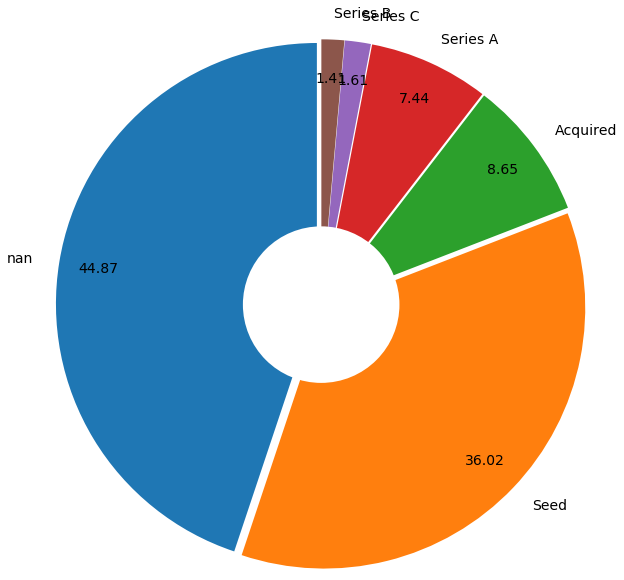

In [317]:
c=Counter(df.Stage)
#print(c.most_common(100))
#len(c)
histo=c.most_common(6)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05, 0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()


ValueError: 'explode' must be of length 'x'

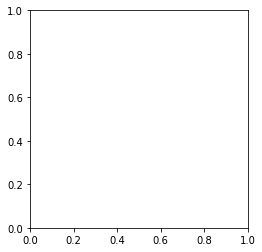

In [315]:
c=Counter(df.Market)
#print(c.most_common(100))
#len(c)
histo=c.most_common(10)
freq={}
for item,count in histo:
    freq[item]=count
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()
# #colors
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# #explsion
# explode = (0.05,0.05,0.05,0.05)
 
# plot.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
# #draw circle
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()

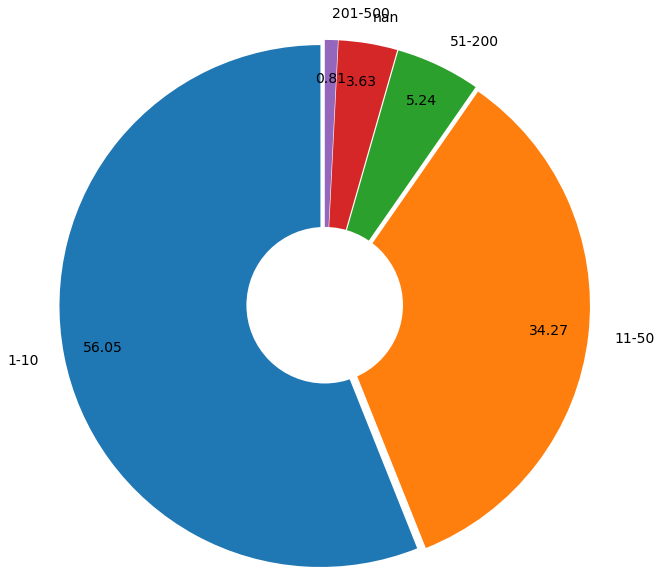

In [303]:
c=Counter(df.Employees)
#print(c.most_common(100))
#len(c)
histo=c.most_common(5)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


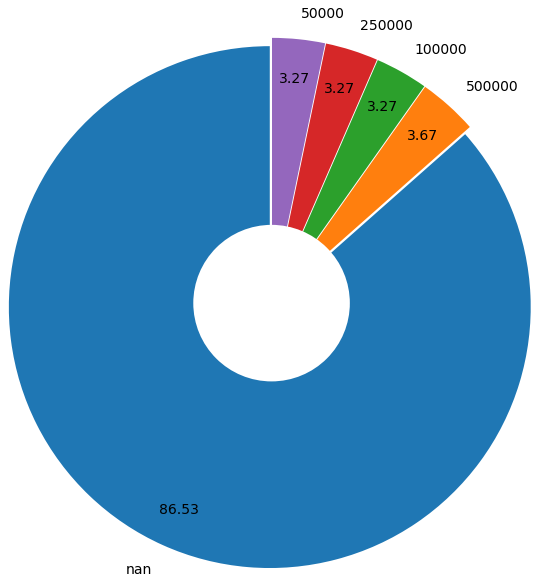

In [308]:
c=Counter(df['Total Raised'])
#print(c.most_common(100))
#len(c)
histo=c.most_common(5)
freq={}
for item,count in histo:
    freq[item]=count
freq
explode = (0.05,0.05,0.05,0.05,0.05)

plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',startangle=90, pctdistance=0.85, explode = explode,radius=3,textprops={'fontsize': 14})


centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
#plt.title("Top 10 Startup Markets in Data/AI")

plt.show()


([<matplotlib.patches.Wedge at 0x129c85c50>,
 [Text(2.106069649560153, 2.5405650220377307, '2014'),
  Text(-2.5865339780143195, 2.049351600037783, '2013'),
  Text(-2.4237951602421273, -2.239468021916554, '2015'),
  Text(0.8557817811593936, -3.1871048842226166, '2012'),
  Text(2.6623802518666273, -1.9498029116991793, '2016'),
  Text(3.2052565720165873, -0.78506707200371, '2011'),
  Text(3.2809650783253304, -0.3539324155960569, '2017'),
  Text(3.2957814912120518, -0.1668063613417279, '2010'),
  Text(3.2997362893301716, -0.04171835180770831, '2018')],
 [Text(1.1487652633964467, 1.3857627392933074, '27.97'),
  Text(-1.4108367152805377, 1.1178281454751542, '22.74'),
  Text(-1.3220700874047964, -1.2215280119544838, '22.33'),
  Text(0.46679006245057825, -1.7384208459396087, '12.27'),
  Text(1.4522074101090692, -1.063528860926825, '9.26'),
  Text(1.7483217665545019, -0.4282184029111144, '3.22'),
  Text(1.78961731545018, -0.19305404487057645, '1.01'),
  Text(1.7976989952065734, -0.0909852880045

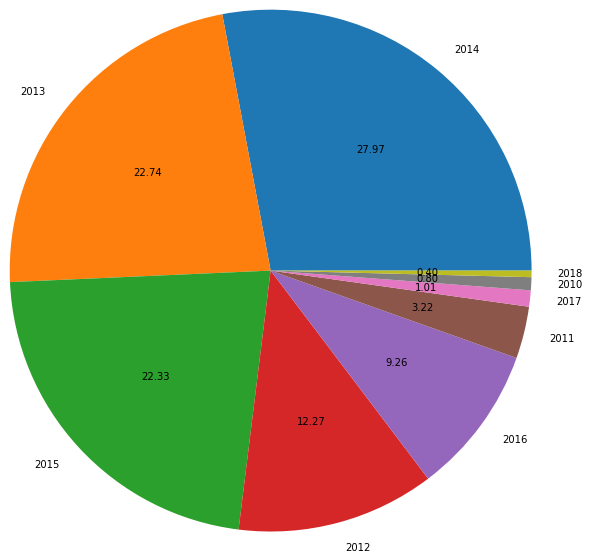

In [257]:
c=Counter(df.Joining_Year)
#print(c.most_common(100))
#len(c)
histo=c.most_common(15)
freq={}
for item,count in histo:
    freq[item]=count
freq
plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f',radius=3)

([<matplotlib.patches.Wedge at 0x129a0a1d0>,
 [Text(1.0243839348820294, 0.4007961501257343, 'Apr '),
  Text(0.523703037830406, 0.9673340313289946, 'Feb '),
  Text(-0.15592063712188223, 1.0888933625105384, 'Mar '),
  Text(-0.7541162168498095, 0.8008175394458661, 'May '),
  Text(-1.0650252482958602, 0.27517489073740276, 'Aug '),
  Text(-1.0650252418549269, -0.27517491566611774, 'Nov '),
  Text(-0.8126341940113179, -0.7413674303094085, 'Jun '),
  Text(-0.37803653756891, -1.0329996980942977, 'Jan '),
  Text(0.12834164403621942, -1.092487264184842, 'Oct '),
  Text(0.5837626779560968, -0.9323202968001536, 'Dec '),
  Text(0.9153402376106556, -0.6100428258826331, 'Jul '),
  Text(1.0802807499278864, -0.20734874326902344, 'Sep ')],
 [Text(0.558754873572016, 0.21861608188676415, '11.87'),
  Text(0.2856562024529487, 0.5276367443612697, '10.46'),
  Text(-0.08504762024829939, 0.5939418340966572, '9.86'),
  Text(-0.4113361182817142, 0.43680956697047235, '9.66'),
  Text(-0.5809228627068327, 0.15009539

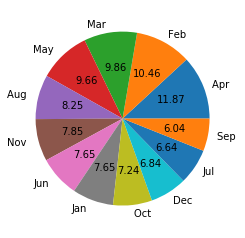

In [248]:
c=Counter(df.Joining_Month)
#print(c.most_common(100))
#len(c)
histo=c.most_common(12)
freq={}
for item,count in histo:
    freq[item]=count
freq
plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f')

([<matplotlib.patches.Wedge at 0x1251d6cc0>,
 [Text(0.4552308264618551, 1.0013814930578937, '4'),
  Text(-1.0840182837974333, -0.18682708688214328, '5'),
  Text(0.5358903272410271, -0.9606360170061837, '3'),
  Text(1.0912213137772147, -0.13869406749508006, '2'),
  Text(1.0992089667442866, -0.04170908089323351, '1')],
 [Text(0.2483077235246482, 0.5462080871224875, '36.42'),
  Text(-0.5912827002531453, -0.10190568375389632, '32.60'),
  Text(0.2923038148587421, -0.5239832820033729, '28.17'),
  Text(0.5952116256966624, -0.07565130954277093, '1.61'),
  Text(0.5995685273150653, -0.02275040775994555, '1.21')])

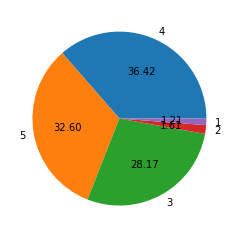

In [128]:
c=Counter(df.Signal)
#print(c.most_common(100))
#len(c)
histo=c.most_common(15)
freq={}
for item,count in histo:
    freq[item]=count
freq
plt.pie([float(v) for v in freq.values()], labels=[(k) for k in freq],
           autopct='%.2f')

In [144]:
#df.groupby(["Location", "Joining_Year"]).size()
# grouped = df.groupby(["Location", "Joining_Year"]).sum().reset_index()
# grouped.sort_values(["Location", "Joining_Year"], ascending=False)

df['COUNTER'] =1       #initially, set that counter to 1.
group_data = df.groupby(["Location", "Joining_Year"])['COUNTER'].sum() #sum function
group_data.head()


Location      Joining_Year
Agoura Hills  2016            1
Albuquerque   2013            1
Ann Arbor     2011            1
Atlanta       2011            1
              2013            3
Name: COUNTER, dtype: int64

In [147]:
#df.sort_values(by=['Joining_Year'])
group_data.sort_values(by='COUNTER', ascending=False, na_position='first')

TypeError: sort_values() got an unexpected keyword argument 'by'

In [149]:
df

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,COUNTER
547,Crowdbooster,https://angel.co/company/crowdbooster,5,San Francisco,Public Relations,http://www.crowdbooster.com/,1-10,Seed,NaN,Nov,2010,1
469,Samba TV,https://angel.co/company/samba-tv,5,San Francisco,Big Data,http://www.samba.tv,201-500,Series A,8000000,Dec,2010,1
685,Charity Engine,https://angel.co/company/charity-engine,5,Boston,Big Data Analytics,http://www.charityengine.com,1-10,NaN,312000,Oct,2010,1
325,Vufind (DBA DeepVu),https://angel.co/company/vufind-1,5,Berkeley,Enterprise Resource Planning,http://deepvu.co,11-50,NaN,NaN,Jul,2010,1
161,Clearfit,https://angel.co/company/clearfit,5,Toronto,Human Resources,http://clearfit.com,11-50,Series A,8700000,Sep,2011,1
265,Kimera Systems,https://angel.co/company/kimera-systems,3,Portland,Internet of Things,http://www.kimerasystems.com,1-10,NaN,100000,Dec,2011,1
179,Tala,https://angel.co/company/talamobile,5,Nairobi,Personal Finance,http://tala.co,201-500,Series C,107400000,Sep,2011,1
184,Pick1,https://angel.co/company/pick1,5,Rome,Market Research,http://www.pick1.com,11-50,Acquired,1650000,Feb,2011,1
185,Desti,https://angel.co/company/desti,5,Palo Alto,Mobile Commerce,http://desti.com,1-10,Acquired,3550000,Oct,2011,1
74,Converge,https://angel.co/company/perfectpost,5,Atlanta,Marketing,http://ConvergeHQ.com,1-10,Seed,350000,Feb,2011,1


In [174]:
from opencage.geocoder import OpenCageGeocode

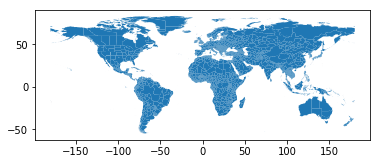

In [171]:
import matplotlib.pyplot as plt
import geopandas
world = geopandas.read_file("continentsshp3147/continentsshp31.shp")
fig, ax = plt.subplots(1, 1)

world.plot(ax=ax)


In [164]:
# !pip3 install geopandas
# !pip3 install descartes
# !pip install geopy


You should consider upgrading via the 'pip install --upgrade pip' command.


In [214]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ds")


In [ ]:
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

# for i in df.Location:
#     if i == "NaN":
#         continue
    
#     df.loc[df.Name == i, 'latitude'] = geolocator.geocode(i).latitude
#     df.loc[df.Name == i, 'longitude'] = geolocator.geocode(i).longitude

# print(df)

In [202]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
df_10=df[:10]
df_10['location'] = df_10['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_10['point'] = df_10['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_10[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_10['point'].tolist(), index=df_10.index)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [204]:
df_11_100=df[11:100]
df_11_100['location'] = df_11_100['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_11_100['point'] = df_11_100['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_11_100[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_11_100['point'].tolist(), index=df_11_100.index)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [205]:
df_101_200=df[101:200]
df_101_200['location'] = df_101_200['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_101_200['point'] = df_101_200['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_101_200[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_101_200['point'].tolist(), index=df_101_200.index)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [206]:
df_201_300=df[201:300]
df_201_300['location'] = df_201_300['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_201_300['point'] = df_201_300['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_201_300[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_201_300['point'].tolist(), index=df_201_300.index)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [209]:
df_301_400=df[301:400]
df_301_400['location'] = df_301_400['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_301_400['point'] = df_301_400['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_301_400[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_301_400['point'].tolist(), index=df_301_400.index)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [216]:
df_401_=df[401:497]
df_401_['location'] = df_401_['Location'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_401_['point'] = df_401_['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_401_[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_401_['point'].tolist(), index=df_401_.index)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Agoura Hills',), **{}).
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1229, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1275, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/http/client.py", line 1224, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib

In [220]:
df_401_.tail(2)

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,location,point,altitude
735,TeamScience,https://angel.co/company/crewspark,4,New York City,Predictive Analytics,https://www.teamscience.com,1-10,NaN,NaN,May,2018,40.712728,-74.006015,"(New York, United States of America, (40.71272...","(40.7127281, -74.0060152, 0.0)",0.0
406,"N&C, Inc",https://angel.co/company/n-c-inc,3,Baltimore,Government Innovation,http://www.Regendus.com,1-10,NaN,684000,Feb,2018,39.290882,-76.610759,"(Baltimore, Maryland, 21203, United States, (3...","(39.2908816, -76.610759, 0.0)",0.0


In [218]:
df_new = pd.concat([df_10, df_11_100,df_101_200,df_201_300,df_301_400,df_401_])
df_new = df_new.sample(frac=1).reset_index(drop=True)

df_new.head()

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,location,point,altitude
0,Accomplice,https://angel.co/company/accomplice,5,San Francisco,Advertising Platforms,http://www.accomplice.io,11-50,Series A,7000000,Feb,2014,37.779281,-122.419236,"(San Francisco, San Francisco City and County,...","(37.7792808, -122.4192363, 0.0)",0.0
1,getfittter,https://angel.co/company/getfittter,4,Dallas,Fitness,http://getfittter.com/,1-10,Seed,30000,Mar,2014,32.776272,-96.796856,"(Dallas, Dallas County, Texas, United States o...","(32.7762719, -96.7968559, 0.0)",0.0
2,progressa,https://angel.co/company/progressa,4,Vancouver,Finance Technology,http://www.progressa.com,51-200,Series A,11400000,Aug,2015,49.260872,-123.113953,"(Vancouver, Metro Vancouver Regional District,...","(49.2608724, -123.1139529, 0.0)",0.0
3,Prisync,https://angel.co/company/prisync,4,NaN,SaaS,http://www.prisync.com,1-10,Seed,180000,Jun,2013,34.220389,70.380031,"(ننگرهار, افغانستان, (34.220389, 70.3800314))","(34.220389, 70.3800314, 0.0)",0.0
4,Desti,https://angel.co/company/desti,5,Palo Alto,Mobile Commerce,http://desti.com,1-10,Acquired,3550000,Oct,2011,37.444329,-122.159847,"(Palo Alto, Santa Clara County, California, Un...","(37.4443293, -122.1598465, 0.0)",0.0


In [222]:
from shapely.geometry import Point, Polygon
crs={'init': 'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_new["longitude"],df_new["latitude"])]

In [223]:
geo_df=gpd.GeoDataFrame(df_new,crs=crs,geometry=geometry)

In [224]:
geo_df.head()

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,location,point,altitude,geometry
0,Accomplice,https://angel.co/company/accomplice,5,San Francisco,Advertising Platforms,http://www.accomplice.io,11-50,Series A,7000000,Feb,2014,37.779281,-122.419236,"(San Francisco, San Francisco City and County,...","(37.7792808, -122.4192363, 0.0)",0.0,POINT (-122.41924 37.77928)
1,getfittter,https://angel.co/company/getfittter,4,Dallas,Fitness,http://getfittter.com/,1-10,Seed,30000,Mar,2014,32.776272,-96.796856,"(Dallas, Dallas County, Texas, United States o...","(32.7762719, -96.7968559, 0.0)",0.0,POINT (-96.79686 32.77627)
2,progressa,https://angel.co/company/progressa,4,Vancouver,Finance Technology,http://www.progressa.com,51-200,Series A,11400000,Aug,2015,49.260872,-123.113953,"(Vancouver, Metro Vancouver Regional District,...","(49.2608724, -123.1139529, 0.0)",0.0,POINT (-123.11395 49.26087)
3,Prisync,https://angel.co/company/prisync,4,NaN,SaaS,http://www.prisync.com,1-10,Seed,180000,Jun,2013,34.220389,70.380031,"(ننگرهار, افغانستان, (34.220389, 70.3800314))","(34.220389, 70.3800314, 0.0)",0.0,POINT (70.38003 34.22039)
4,Desti,https://angel.co/company/desti,5,Palo Alto,Mobile Commerce,http://desti.com,1-10,Acquired,3550000,Oct,2011,37.444329,-122.159847,"(Palo Alto, Santa Clara County, California, Un...","(37.4443293, -122.1598465, 0.0)",0.0,POINT (-122.15985 37.44433)


In [231]:
geo_df.dtypes

Name               object
Profile URL        object
Signal             object
Location           object
Market             object
Website            object
Employees          object
Stage              object
Total Raised       object
Joining_Month      object
Joining_Year       object
latitude          float64
longitude         float64
location           object
point              object
altitude          float64
geometry         geometry
dtype: object

Text(0.5, 1.0, 'Global distribution of DS/AI Startups joining AngelList before and after 2013')

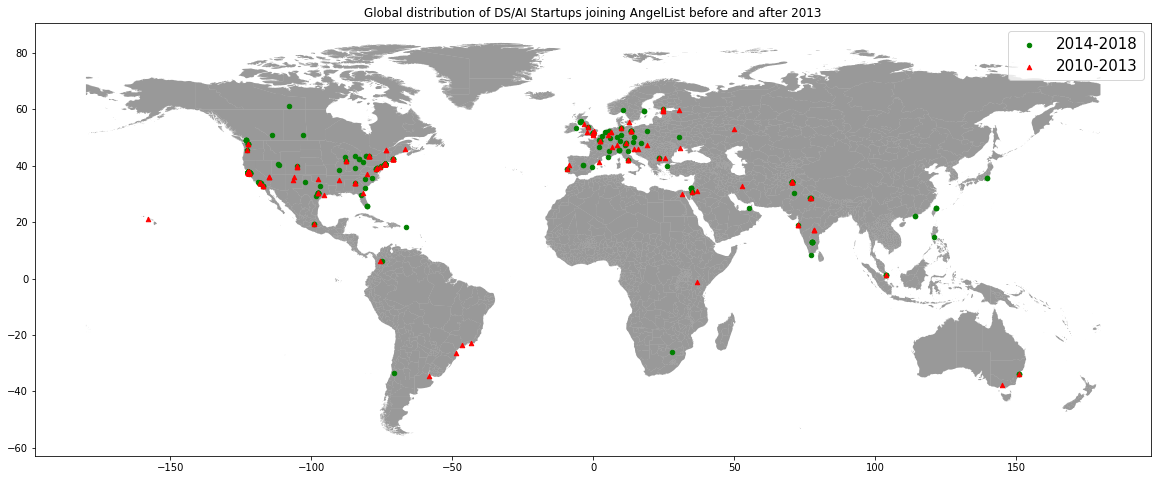

In [305]:
fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax,alpha=0.4,color='grey')
geo_df[(geo_df['Joining_Year']).astype(str).astype(int)>2013].plot(ax=ax,markersize=20,color='green',marker="o",label="2014-2018")
geo_df[(geo_df['Joining_Year']).astype(str).astype(int)<=2013].plot(ax=ax,markersize=20,color='red',marker="^",label="2010-2013")
plt.legend(prop={'size':15})
plt.title("Global distribution of DS/AI Startups joining AngelList before and after 2013")

Text(0.5, 1.0, 'Global distribution of funds raised in DS/AI Startups')

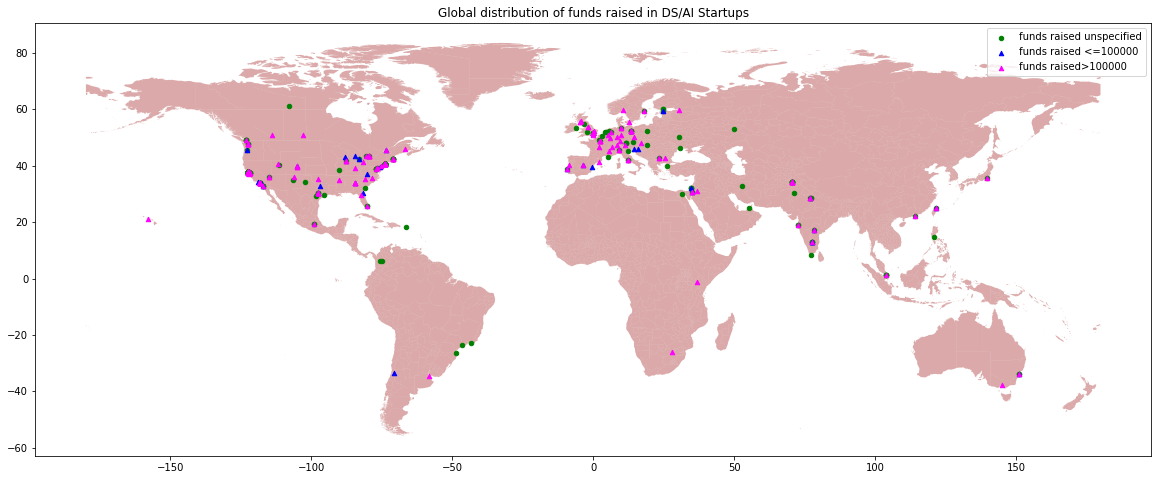

In [333]:
import math
fig, ax = plt.subplots(figsize=(20, 20))
world.plot(ax=ax,alpha=0.4,color='brown')
geo_df['Total Raised'].fillna(0, inplace=True)
geo_df[(geo_df['Total Raised']).astype(str).astype(int)==0].plot(ax=ax,markersize=20,color='green',marker="o",label="funds raised unspecified")
geo_df[((geo_df['Total Raised']).astype(str).astype(int)<=100000) & ((geo_df['Total Raised']).astype(str).astype(int)>0)].plot(ax=ax,markersize=20,color='blue',marker="^",label="funds raised <=100000")
geo_df[(geo_df['Total Raised']).astype(str).astype(int)>100000].plot(ax=ax,markersize=20,color='magenta',marker="^",label="funds raised>100000")

plt.legend(prop={'size':10})
plt.title("Global distribution of funds raised in DS/AI Startups")

In [244]:
df_new=df_new.drop(['altitude'],axis=1)

In [246]:
df_new.head()

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,location,point,geometry
0,Accomplice,https://angel.co/company/accomplice,5,San Francisco,Advertising Platforms,http://www.accomplice.io,11-50,Series A,7000000,Feb,2014,37.779281,-122.419236,"(San Francisco, San Francisco City and County,...","(37.7792808, -122.4192363, 0.0)",POINT (-122.41924 37.77928)
1,getfittter,https://angel.co/company/getfittter,4,Dallas,Fitness,http://getfittter.com/,1-10,Seed,30000,Mar,2014,32.776272,-96.796856,"(Dallas, Dallas County, Texas, United States o...","(32.7762719, -96.7968559, 0.0)",POINT (-96.79686 32.77627)
2,progressa,https://angel.co/company/progressa,4,Vancouver,Finance Technology,http://www.progressa.com,51-200,Series A,11400000,Aug,2015,49.260872,-123.113953,"(Vancouver, Metro Vancouver Regional District,...","(49.2608724, -123.1139529, 0.0)",POINT (-123.11395 49.26087)
3,Prisync,https://angel.co/company/prisync,4,NaN,SaaS,http://www.prisync.com,1-10,Seed,180000,Jun,2013,34.220389,70.380031,"(ننگرهار, افغانستان, (34.220389, 70.3800314))","(34.220389, 70.3800314, 0.0)",POINT (70.38003 34.22039)
4,Desti,https://angel.co/company/desti,5,Palo Alto,Mobile Commerce,http://desti.com,1-10,Acquired,3550000,Oct,2011,37.444329,-122.159847,"(Palo Alto, Santa Clara County, California, Un...","(37.4443293, -122.1598465, 0.0)",POINT (-122.15985 37.44433)


In [277]:
export_csv = df.to_csv ('AngelList_Startups.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [330]:
geo_df.head(100)

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude,location,point,altitude,geometry
0,Accomplice,https://angel.co/company/accomplice,5,San Francisco,Advertising Platforms,http://www.accomplice.io,11-50,Series A,7000000,Feb,2014,37.779281,-122.419236,"(San Francisco, San Francisco City and County,...","(37.7792808, -122.4192363, 0.0)",0.0,POINT (-122.41924 37.77928)
1,getfittter,https://angel.co/company/getfittter,4,Dallas,Fitness,http://getfittter.com/,1-10,Seed,30000,Mar,2014,32.776272,-96.796856,"(Dallas, Dallas County, Texas, United States o...","(32.7762719, -96.7968559, 0.0)",0.0,POINT (-96.79686 32.77627)
2,progressa,https://angel.co/company/progressa,4,Vancouver,Finance Technology,http://www.progressa.com,51-200,Series A,11400000,Aug,2015,49.260872,-123.113953,"(Vancouver, Metro Vancouver Regional District,...","(49.2608724, -123.1139529, 0.0)",0.0,POINT (-123.11395 49.26087)
3,Prisync,https://angel.co/company/prisync,4,NaN,SaaS,http://www.prisync.com,1-10,Seed,180000,Jun,2013,34.220389,70.380031,"(ننگرهار, افغانستان, (34.220389, 70.3800314))","(34.220389, 70.3800314, 0.0)",0.0,POINT (70.38003 34.22039)
4,Desti,https://angel.co/company/desti,5,Palo Alto,Mobile Commerce,http://desti.com,1-10,Acquired,3550000,Oct,2011,37.444329,-122.159847,"(Palo Alto, Santa Clara County, California, Un...","(37.4443293, -122.1598465, 0.0)",0.0,POINT (-122.15985 37.44433)
5,Episona,https://angel.co/company/episona,4,Los Angeles,Medical Devices,http://episona.com,1-10,Seed,1375000,Jan,2014,34.053691,-118.242767,"(Los Angeles, Los Angeles County, California, ...","(34.0536909, -118.2427666, 0.0)",0.0,POINT (-118.24277 34.05369)
6,Watchsend,https://angel.co/company/watchsend,5,Mountain View,User Testing,http://www.watchsend.com,1-10,Acquired,0,Aug,2013,37.389389,-122.083210,"(Mountain View, Santa Clara County, California...","(37.3893889, -122.0832101, 0.0)",0.0,POINT (-122.08321 37.38939)
7,uSens,https://angel.co/company/usens,4,San Jose,Digital Signage,http://www.usens.com,11-50,Series A,26700000,Jan,2015,37.336191,-121.890583,"(San Jose, Santa Clara County, California, Uni...","(37.3361905, -121.8905833, 0.0)",0.0,POINT (-121.89058 37.33619)
8,GMDH Shell,https://angel.co/company/gmdh-shell,3,NaN,Enterprise Resource Planning,http://www.gmdhshell.com,1-10,NaN,0,Jun,2013,34.220389,70.380031,"(ننگرهار, افغانستان, (34.220389, 70.3800314))","(34.220389, 70.3800314, 0.0)",0.0,POINT (70.38003 34.22039)
9,Inbify,https://angel.co/company/inbify,3,Puerto Rico,Hospitality,http://inbify.com/,1-10,NaN,0,Nov,2014,18.221417,-66.413282,"(Puerto Rico, Orocovis, Puerto Rico, United St...","(18.22141715, -66.4132818505648, 0.0)",0.0,POINT (-66.41328 18.22142)


In [334]:
df2=pd.read_csv("AngelList_Startups.csv")

In [335]:
df2.head()

,Name,Profile URL,Signal,Location,Market,Website,Employees,Stage,Total Raised,Joining_Month,Joining_Year,latitude,longitude
0,Crowdbooster,https://angel.co/company/crowdbooster,5,San Francisco,Public Relations,http://www.crowdbooster.com/,1-10,Seed,NaN,Nov,2010,37.779281,-122.419236
1,Samba TV,https://angel.co/company/samba-tv,5,San Francisco,Big Data,http://www.samba.tv,201-500,Series A,8000000.0,Dec,2010,37.779281,-122.419236
2,Charity Engine,https://angel.co/company/charity-engine,5,Boston,Big Data Analytics,http://www.charityengine.com,1-10,NaN,312000.0,Oct,2010,42.360253,-71.058291
3,Vufind (DBA DeepVu),https://angel.co/company/vufind-1,5,Berkeley,Enterprise Resource Planning,http://deepvu.co,11-50,NaN,NaN,Jul,2010,37.870839,-122.272864
4,Clearfit,https://angel.co/company/clearfit,5,Toronto,Human Resources,http://clearfit.com,11-50,Series A,8700000.0,Sep,2011,43.653963,-79.387207
